In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC


In [10]:
iris = datasets.load_iris()
X = iris['data'][:,(2,3)]
y = (iris['target']==2).astype(np.float64)

# svm_clf = Pipeline((
#     ('scaler', StandardScaler()),
#     ('linear_svc', LinearSVC(C=1, loss='hinge'))
# ))
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
svm_clf = LinearSVC(C=1, loss='hinge')
# svm_clf.fit(X,y)
svm_clf.fit(X_scaled, y)
svm_clf.predict([[5.5,1.7]])

array([1.])

In [11]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

In [12]:
poly_features = PolynomialFeatures(degree=3)

In [13]:
scaler = StandardScaler()

In [14]:
svm_clf = LinearSVC(C=10, loss='hinge')

In [15]:
svm_clf.fit(X,y)

c:\users\nana\anaconda3\envs\ml-learn-3.5\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [24]:
import os
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

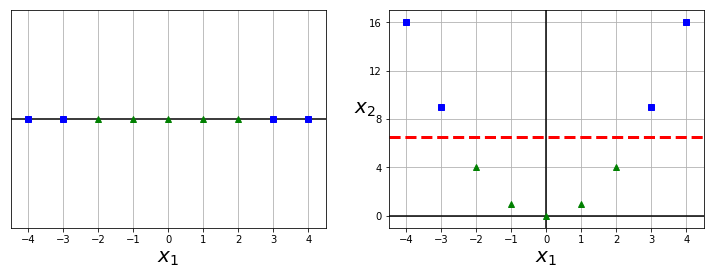

In [26]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

# save_fig("higher_dimensions_plot", tight_layout=False)
plt.show()

In [27]:
from sklearn.datasets import make_moons


In [28]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

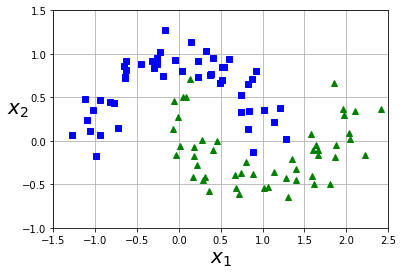

In [38]:
def plot_dataset(X,y,axes):
    plt.plot(X[:,0][y==0], X[:,1][y==0], 'bs')
    plt.plot(X[:,0][y==1], X[:,1][y==1], 'g^')
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r'$x_1$', fontsize=20)
    plt.ylabel(r'$x_2$', fontsize=20, rotation=0)
    
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [42]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [45]:
polynomial_svm_clf = Pipeline((
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge')),
))
polynomial_svm_clf.fit(X,y)

c:\users\nana\anaconda3\envs\ml-learn-3.5\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [46]:
def plot_predictions(clf,axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0,x1,y_pred,cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0,x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

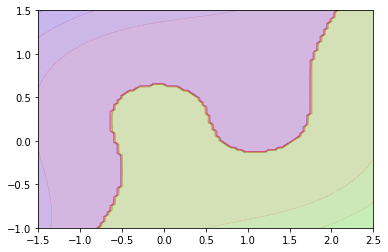

In [47]:
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])

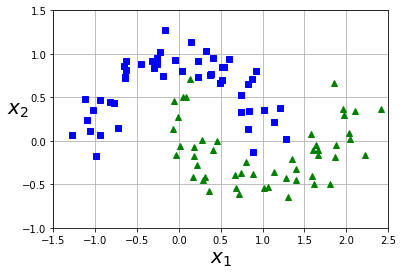

In [48]:
plot_dataset(X,y,[-1.5, 2.5, -1, 1.5])

In [49]:
plt.show()

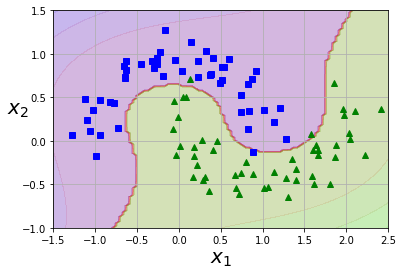

In [50]:
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X,y,[-1.5, 2.5, -1, 1.5])

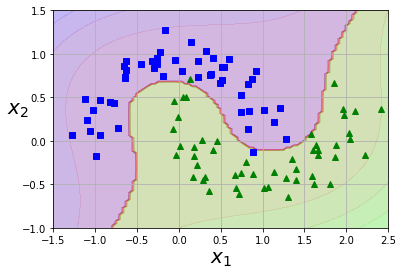

In [56]:
poly_kernel_svm_clf = Pipeline((
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
))
poly_kernel_svm_clf.fit(X, y)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X,y,[-1.5, 2.5, -1, 1.5])



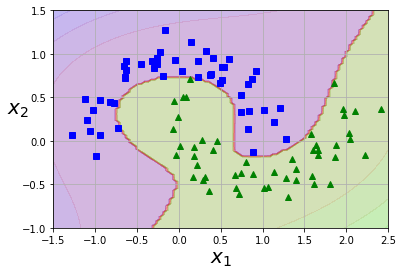

In [54]:
poly100_kernel_svm_clf = Pipeline((
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=10, coef0=100, C=5))
))
poly100_kernel_svm_clf.fit(X, y)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X,y,[-1.5, 2.5, -1, 1.5])

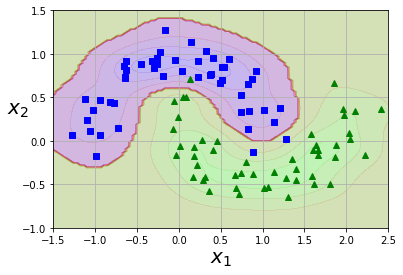

In [57]:
rbf_kernel_svm_clf = Pipeline((
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', C=0.001, gamma=5))
))
rbf_kernel_svm_clf.fit(X,y)
plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

In [59]:
from sklearn.svm import LinearSVR
import numpy as np
np.random.seed(42)
m=50
X = 2*np.random.rand(m,1)
y= (4 + 3*X + np.random.randn(m,1)).ravel()

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)


LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)